**Mount gdrive**

In [5]:
#Mount drive to access files in gdrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


 **Introduction**

In the following analysis, we will talk about how one can create an NLP to detect whether the news is real or fake. Nowadays, fake news has become a common trend. Even trusted media houses are known to spread fake news and are losing their credibility. So, how can we trust any news to be real or fake?

Dataset - 

1. train.csv: A full training dataset with the following attributes:

2. id: unique id for a news article.

3. title: the title of a news article.

4. author: author of the news article.

5. text: the text of the article; could be incomplete.

6. label: a label that marks the article as potentially unreliable. 

Where 1: unreliable and 0: reliable.

**Importing Libraries**

In [6]:
# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# Computations
import itertools

# Visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**Loadinng Dataset**

In [7]:
train = pd.read_csv("/content/gdrive/MyDrive/NLP_Project/fake-news/train.csv")
test  = pd.read_csv ("/content/gdrive/MyDrive/NLP_Project/fake-news/test.csv")
submit  = pd.read_csv ("/content/gdrive/MyDrive/NLP_Project/fake-news/submit.csv")

In [8]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
print(f"Train Shape : {train.shape}")
print(f"Test Shape : {test.shape}")
print(f"Submit Shape : {submit.shape}")

Train Shape : (20800, 5)
Test Shape : (5200, 4)
Submit Shape : (5200, 2)


**Data Preprocessing**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [11]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
#DROPPING NULL VALUES

train = train.dropna()
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
train.dtypes.value_counts()

object    3
int64     2
dtype: int64

If model is trained on a concatenation of the title, the author and the main text, the model would be more generalized because adding more words to the input might increase the reliablity of the model.

In [15]:
test=test.fillna(' ')
train=train.fillna(' ')

# Create a column with all the data available
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']

# Have a glance at our training set
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
 5   total   18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 1000.0+ KB


,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


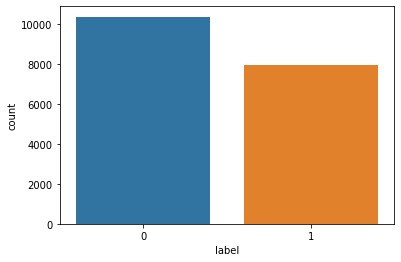

In [16]:
#checking number of real and fake news
sns.countplot(x = 'label',data = train)

ALMOST 10000 ARE RELIABLE(0) AND 8000 ARE UNRELIABLE(1)

In [17]:
# Dividing the training set by using train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['total'], train.label, test_size=0.20, random_state=0)

**Vectorizing our Data**

The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.


1.   Count Vectors as features

2.   TF-IDF Vectors as features

     > Word level

     > Ngram level

     > Character level







**1. Count Vectorizer**

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [18]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

**2. Tf-IDF Vectorizer**

TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)**

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**

**TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)**

> a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents

> b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams

> c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus

Here, For my dataset Character level TF-IDF is not suitable so we are using N-gram level with range (1,2) as unigram and bigram and because of that their is no need to use word level also.



In [16]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

**First NLP Model** 

*   **Multinomial Naive Bayes with Count Vectorizer (BagofWords)**



In [17]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)

print("Multinomial Naive Bayes with Count Vectorizer : " ,acc_nb_count)
print(f"Classification Report : \n\n{classification_report(y_test, pred_nb_count)}")

Multinomial Naive Bayes with Count Vectorizer :  0.954334153677878
Classification Report : 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2040
           1       0.99      0.90      0.95      1617

    accuracy                           0.95      3657
   macro avg       0.96      0.95      0.95      3657
weighted avg       0.96      0.95      0.95      3657



In [18]:
# tune the hyperparameter alpha for the naive bayes classifier

for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.91222
Alpha: 0.05 Score: 0.95051
Alpha: 0.10 Score: 0.95433
Alpha: 0.15 Score: 0.95433
Alpha: 0.20 Score: 0.95324
Alpha: 0.25 Score: 0.95160
Alpha: 0.30 Score: 0.95078
Alpha: 0.35 Score: 0.94996
Alpha: 0.40 Score: 0.94859
Alpha: 0.45 Score: 0.94750
Alpha: 0.50 Score: 0.94476
Alpha: 0.55 Score: 0.94367
Alpha: 0.60 Score: 0.94203
Alpha: 0.65 Score: 0.94011
Alpha: 0.70 Score: 0.93820
Alpha: 0.75 Score: 0.93683
Alpha: 0.80 Score: 0.93465
Alpha: 0.85 Score: 0.93246
Alpha: 0.90 Score: 0.93164
Alpha: 0.95 Score: 0.92972


The best score is obtained for alpha = 0.10, and is equal to 0.95844.

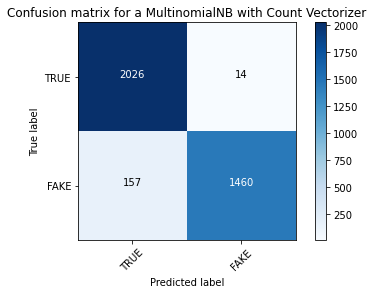

In [36]:
# Let's re-run our fine-tuned model and plot the confusion matrix

nb_classifier = MultinomialNB(alpha = 0.20)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])

# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

We see that although our model has a general accuracy of 89.58 %, which is good, but it does not really score well in view of number of false negative. 287 fake news are classified as true news with this model, which is not pleasing to see. So we will try to use the Tf-IDF vectorizer on this same model to see if it performs better.

*   **Multinomial Naive Bayes with TF-IDF Vectorizer**



In [20]:
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print("Multinomial Naive Bayes with TF-IDF : " ,acc_nb_tfidf)

Multinomial Naive Bayes with TF-IDF :  0.9491386382280558


In [21]:
# tune the hyperparameter alpha for the naive bayes classifier

for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00  Score: 0.90484
Alpha: 0.01  Score: 0.94914
Alpha: 0.02  Score: 0.94586
Alpha: 0.03  Score: 0.93820
Alpha: 0.04  Score: 0.93218
Alpha: 0.05  Score: 0.92480
Alpha: 0.06  Score: 0.91824
Alpha: 0.07  Score: 0.91140
Alpha: 0.08  Score: 0.90566
Alpha: 0.09  Score: 0.90046


Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2040
           1       0.99      0.89      0.94      1617

    accuracy                           0.95      3657
   macro avg       0.96      0.94      0.95      3657
weighted avg       0.95      0.95      0.95      3657



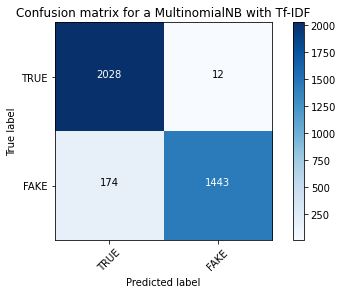

In [22]:
# Let's run the optimized model with best value of hyperparameter and check the confusion matrix

nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
print(f"Classification Report : \n\n{classification_report(y_test, pred_nb_tfidf)}")
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')


This confusion matrix above confirms that this new model not thaat better (and its accuracy score is 87.77 %). However, too many fake news are labeled as true news and it increases in this one. Let's try with another model called PassiveAgressive Classifier which is special for text classification purposes.

**Second NLP Algorithm**


*   **Passive Agressive Classifier With Count Vectorizerr**



Passive Agressive Classifier with Count Vectorizer :  0.9734755263877495
Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2040
           1       0.97      0.97      0.97      1617

    accuracy                           0.97      3657
   macro avg       0.97      0.97      0.97      3657
weighted avg       0.97      0.97      0.97      3657



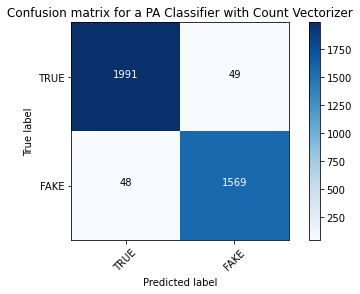

In [23]:
linear_classifier = PassiveAggressiveClassifier(max_iter=500)
linear_classifier.fit(count_train, y_train)
pred_linear_count = linear_classifier.predict(count_test)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print("Passive Agressive Classifier with Count Vectorizer : " ,acc_linear_count)
print(f"Classification Report : \n\n{classification_report(y_test, pred_linear_count)}")
cm6 = metrics.confusion_matrix(y_test, pred_linear_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')


We get much better results than with the MultinomialNB model, both in terms of accuracy and in terms of false negative. Only 38 fake news were labeled as true news this time.

But the 198 ture news were labeled as fake news and this count increases in this method. Let's try with the Tf-IDF method.



*   **Passive Agressive Classifier With TF-IDF Vectorizer**



Passive Agressive Classifier with TF-IDF :  0.9797648345638501
Classification Report : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2040
           1       0.99      0.97      0.98      1617

    accuracy                           0.98      3657
   macro avg       0.98      0.98      0.98      3657
weighted avg       0.98      0.98      0.98      3657



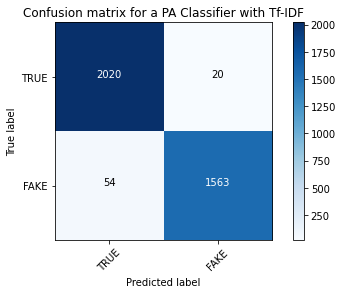

In [24]:
linear_classifier = PassiveAggressiveClassifier(max_iter=500)
linear_classifier.fit(tfidf_train, y_train)
pred_linear_tfidf = linear_classifier.predict(tfidf_test)
acc_linear_tfidf = metrics.accuracy_score(y_test, pred_linear_tfidf)
print("Passive Agressive Classifier with TF-IDF : " ,acc_linear_tfidf)
print(f"Classification Report : \n\n{classification_report(y_test, pred_linear_tfidf)}")
cm5 = metrics.confusion_matrix(y_test, pred_linear_tfidf, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Tf-IDF')

Although we observe more false negative, the overall accuracy is much better, hence so far this is our best model. Let's try with Logistic Regression now!

**Third NLP Algorithm**

*   **Logistic Regression with CountVectorizer**



Logistic Regression with Count Vectorizer :  0.9786710418375718
Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2040
           1       0.98      0.97      0.98      1617

    accuracy                           0.98      3657
   macro avg       0.98      0.98      0.98      3657
weighted avg       0.98      0.98      0.98      3657



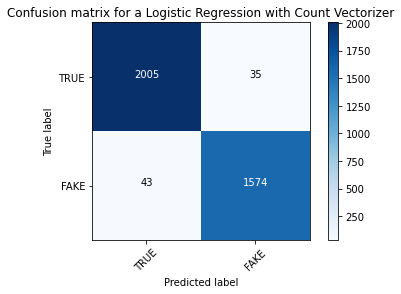

In [25]:
logreg = LogisticRegression(C=0.05)
logreg.fit(count_train, y_train)
pred_logreg_count = logreg.predict(count_test)
acc_logreg_count = metrics.accuracy_score(y_test,pred_logreg_count)
print("Logistic Regression with Count Vectorizer : " ,acc_logreg_count)
print(f"Classification Report : \n\n{classification_report(y_test,pred_logreg_count)}")
cm3 = metrics.confusion_matrix(y_test, pred_logreg_count, labels=[0,1])
plot_confusion_matrix(cm3, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

Logistic Regression with TF-IDF :  0.9783975936560022
Classification Report : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2040
           1       0.99      0.96      0.98      1617

    accuracy                           0.98      3657
   macro avg       0.98      0.98      0.98      3657
weighted avg       0.98      0.98      0.98      3657



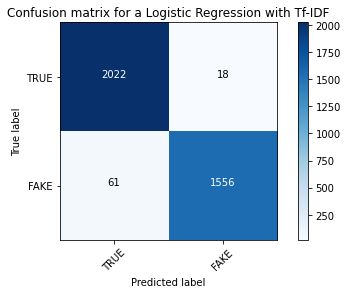

In [26]:
logreg = LogisticRegression(C=1e6)
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print("Logistic Regression with TF-IDF : " ,acc_logreg_tfidf)
print(f"Classification Report : \n\n{classification_report(y_test,pred_logreg_tfidf)}")
cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

**CLASSIFYING FAKE NEWS USING LSTM & RNN**

In [19]:
#importing libraries
import re
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
test['total']=test['title']+' '+test['author']
train['total']=train['title']+' '+train['author']

train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [21]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
total     0
dtype: int64

In [22]:
train = train.dropna()
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
total     0
dtype: int64

In [23]:
train.reset_index(inplace = True,drop = True)
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [24]:
#defining dependent and independent vectors
#taking only total for prediction
x = train.iloc[:,5:]
y = train['label']

In [25]:
x

,total
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...
...,...
18280,Rapper T.I.: Trump a ’Poster Child For White S...
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
18282,Macy’s Is Said to Receive Takeover Approach by...
18283,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [26]:
#Text Cleaning and preprocessing

cleaned = []
for i in range(0,len(train)):
    
    #removing words any other than (a-z) and (A-Z)
    text = re.sub('[^a-zA-Z]',' ', x['total'][i])
    
    #converting all words into lower case
    text = text.lower()
    
    #tokenizing 
    text = text.split()
    
    #stemming and removing stopwords
    ps = PorterStemmer()
    text = [ps.stem(words) for words in text if words not in stopwords.words('english')]
    text = ' '.join(text)
    cleaned.append(text)

                        
      

In [27]:
#cleaned text
cleaned[:5]

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu',
 'flynn hillari clinton big woman campu breitbart daniel j flynn',
 'truth might get fire consortiumnew com',
 'civilian kill singl us airstrik identifi jessica purkiss',
 'iranian woman jail fiction unpublish stori woman stone death adulteri howard portnoy']

In [28]:
#taking dictionary size 5000
vocab_size = 5000

#one hot encoding
one_hot_dir = [one_hot(words,vocab_size) for words in cleaned]

#length of all rows should be equal therefore applying padding
#this will adjust size by adding 0 at staring of the shorter rows
embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
embedded_layer

array([[   0,    0,    0, ..., 1215, 1217, 1531],
       [   0,    0,    0, ..., 2233, 4636, 3276],
       [   0,    0,    0, ..., 1114, 2931,  347],
       ...,
       [   0,    0,    0, ..., 1791, 2503, 4270],
       [   0,    0,    0, ...,  346, 1952, 1479],
       [   0,    0,    0, ..., 4768, 3528, 3421]], dtype=int32)

In [29]:
#converting into numpy arrays.
x = np.array(embedded_layer)
y = np.array(y)

In [30]:
#splitting the Dataset into Train and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**RNN Implementaion - Shallow neural n/w**

In [31]:
model = Sequential()

#taking number features as 50
model.add(Embedding(vocab_size,50,input_length = len(embedded_layer[0])))
model.add(Dropout(0.5))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(1))

model.summary()

#compiling the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 50)            250000    
_________________________________________________________________
dropout (Dropout)            (None, 51, 50)            0         
_________________________________________________________________
gru (GRU)                    (None, 51, 256)           236544    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 535,953
Trainable params: 535,953
Non-trainable params: 0
_________________________________________________________________


In [32]:
#training the model
model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 5, batch_size = 32)

Epoch 1/5
458/458 [==============================] - 77s 162ms/step - loss: 0.2741 - accuracy: 0.9299 - val_loss: 0.0545 - val_accuracy: 0.9885
Epoch 2/5
458/458 [==============================] - 74s 162ms/step - loss: 0.0778 - accuracy: 0.9890 - val_loss: 0.0486 - val_accuracy: 0.9934
Epoch 3/5
458/458 [==============================] - 75s 164ms/step - loss: 0.0451 - accuracy: 0.9932 - val_loss: 0.0456 - val_accuracy: 0.9943
Epoch 4/5
458/458 [==============================] - 75s 163ms/step - loss: 0.0330 - accuracy: 0.9960 - val_loss: 0.0335 - val_accuracy: 0.9959
Epoch 5/5
458/458 [==============================] - 75s 165ms/step - loss: 0.0289 - accuracy: 0.9972 - val_loss: 0.0762 - val_accuracy: 0.9932


In [33]:
#predicting and getting accuracy
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9931637954607602

Accuracy Score :  0.9931637954607602


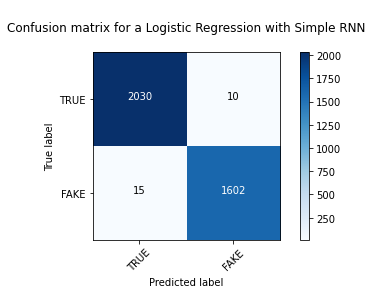

In [38]:
#getting confusion matrix
from sklearn.metrics import confusion_matrix
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
cm5 = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='\nConfusion matrix for a Logistic Regression with Simple RNN\n')

**LSTM Implementation**

In [39]:
#creating model using LSTM
model = Sequential()

#taking number features as 50
model.add(Embedding(vocab_size,50,input_length = len(embedded_layer[0])))
model.add(Dropout(0.5))

#adding LSTM layers with 100 neurons
model.add(LSTM(128))
model.add(Dropout(0.5))

#adding output layer 
model.add(Dense(1,activation="sigmoid"))

#compiling the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [40]:
#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 51, 50)            250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 51, 50)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 341,777
Trainable params: 341,777
Non-trainable params: 0
_________________________________________________________________


In [41]:
#training the model
model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 5, batch_size = 32)

Epoch 1/5
458/458 [==============================] - 33s 68ms/step - loss: 0.1592 - accuracy: 0.9331 - val_loss: 0.0294 - val_accuracy: 0.9907
Epoch 2/5
458/458 [==============================] - 30s 66ms/step - loss: 0.0264 - accuracy: 0.9925 - val_loss: 0.0244 - val_accuracy: 0.9932
Epoch 3/5
458/458 [==============================] - 31s 67ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0182 - val_accuracy: 0.9948
Epoch 4/5
458/458 [==============================] - 30s 66ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0232 - val_accuracy: 0.9937
Epoch 5/5
458/458 [==============================] - 31s 68ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0315 - val_accuracy: 0.9912


In [42]:
#predicting and getting accuracy
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9912496581897731

Accuracy Score :  0.9912496581897731


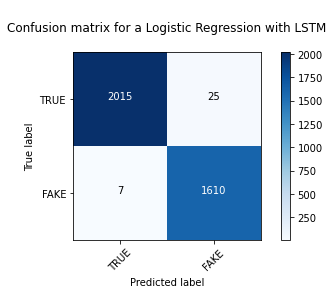

In [43]:
#getting confusion matrix
from sklearn.metrics import confusion_matrix
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
cm5 = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='\nConfusion matrix for a Logistic Regression with LSTM\n')